<a href="https://colab.research.google.com/github/insanitydsl/UniversityProject/blob/KnapsackProblem_Airline/airlineknapsack_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import csv
import timeit
import random
import matplotlib.pyplot as plt
from tabulate import tabulate

def read_items_from_csv(Travel_Items):
    items = []
    with open('Travel_Items.csv', 'r') as f:
        reader = csv.reader(f)
        next(reader)  # skip the header row
        for row in reader:
            items.append({
                'Items': row[0],
                'Profits': int(row[1]),
                'Weights': int(row[2])
            })
    return items

items = read_items_from_csv('items.csv')
print(tabulate(items))

---------------------------  --  ----
Passport or ID                1   100
Laptop                        4  1500
Camera                        5   600
Cell phone                    3   300
Portable charger              6   200
Travel adapter                7   100
Water bottle                  8   500
Travel-sized toiletries       9   150
Cash and credit cards         2    50
Travel pillow                60   200
Shampoo                      10   200
Soap                         11   100
Toothpaste                   12    50
Toothbrush                   13    20
Shaving cream                14    50
Deodorant                    15   100
Makeup                       16   150
Hairbrush                    17    50
Sunglasses                   18    20
Earplugs                     19     5
Book                         20   500
Clothes                      21  1200
Shoes                        22   800
Sneakers                     23   600
Hat                          24   100
Socks       

In [7]:
# solving using greedy method
def solve_knapsack_greedy(items, max_weight):
    sorted_items = sorted(items, key=lambda x: x['Profits'] / x['Weights'], reverse=True) # sort by desc order
    # declare and initialize total profit & weight
    total_profit = 0
    total_weight = 0
    selected_items = []
    for item in sorted_items:
        if total_weight + item['Weights'] <= max_weight: # if item can be added into the bag, add it
            selected_items.append(item) # create list of selected item that can be added into the bag
            total_profit += item['Profits'] # add all of the selected item profit
            total_weight += item['Weights'] # add all of the selected weight profit
    return (total_profit, selected_items)

max_weight = 2300 # in gram

total_profit, selected_items = solve_knapsack_greedy(items, max_weight)
print(f'Total Profits: {total_profit}')
print(f'Selected Items: {tabulate(selected_items)}') # display list of item in table

Total Profits: 819
Selected Items: -----------------  --  ---
Earplugs           59    5
Earplugs           19    5
Pen                38   20
Sleeping mask      28   20
Sunglasses         18   20
Keychain           40   50
Toothbrush         13   20
Eyemask            31   50
Headlamp           44  100
Beach ball         55  150
Hairbrush          17   50
Neck pillow        32  100
Travel pillow      60  200
Shaving cream      14   50
Watch              41  150
Wallet             39  150
Swimwear           51  200
Journal            37  150
Toothpaste         12   50
Hat                24  100
Slippers           35  150
Headphones         34  150
Multi-tool         45  200
Compression socks  33  150
-----------------  --  ---


In [8]:
#solving using dynamic method
def solve_knapsack_dynamic(items, max_weight):
    n = len(items)
    profit = [[0] * (max_weight + 1) for _ in range(n + 1)] # create 2D array to store sub problem
    for i in range(1, n + 1): # loop through items
        for j in range(1, max_weight + 1): # loop through capacity
            # if the current item is more than the current capacity, we cannot include it in the knapsack
            if items[i - 1]['Weights'] > j:
                profit[i][j] = profit[i - 1][j]
            else:
              # calculate the maximum value by either including the current item or not including it
                profit[i][j] = max(profit[i - 1][j], profit[i - 1][j - items[i - 1]['Weights']] + items[i - 1]['Profits'])
    selected_items = []
    j = max_weight
    for i in range(n, 0, -1):
        if profit[i][j] != profit[i - 1][j]:
            selected_items.append(items[i - 1])
            j -= items[i - 1]['Weights']
    selected_items.reverse()
    return (profit[n][max_weight], selected_items)

max_weight = 2300 # in gram

total_profit, selected_items = solve_knapsack_dynamic(items, max_weight)
print(f'Total Profits: {total_profit}')
print(f'Selected Items: {tabulate(selected_items)}') # display list of item in table

Total Profits: 819
Selected Items: -----------------  --  ---
Travel pillow      60  200
Toothpaste         12   50
Toothbrush         13   20
Shaving cream      14   50
Hairbrush          17   50
Sunglasses         18   20
Earplugs           19    5
Hat                24  100
Swimwear           51  200
Beach ball         55  150
Sleeping mask      28   20
Earplugs           59    5
Eyemask            31   50
Neck pillow        32  100
Compression socks  33  150
Headphones         34  150
Slippers           35  150
Journal            37  150
Pen                38   20
Wallet             39  150
Keychain           40   50
Watch              41  150
Headlamp           44  100
Multi-tool         45  200
-----------------  --  ---


Execution time of the greedy algorithm: 0.000616 seconds
Execution time of the dynamic programming algorithm: 0.997768 seconds


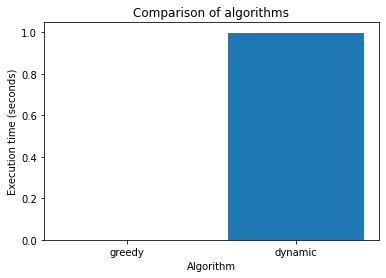

In [9]:
random.seed(0)
items = []
for i in range(1000):
    items.append({
        'Items': f'item{i}',
        'Profits': random.randint(1, 100),
        'Weights': random.randint(1, 100)
        
    })
max_weight = 2300

# measure the execution time of the greedy algorithm
t = timeit.timeit(lambda: solve_knapsack_greedy(items, max_weight), number=1)
print(f'Execution time of the greedy algorithm: {t:.6f} seconds')

# measure the execution time of the dynamic programming algorithm
t1 = timeit.timeit(lambda: solve_knapsack_dynamic(items, max_weight), number=1)
print(f'Execution time of the dynamic programming algorithm: {t1:.6f} seconds')

# data to be plotted
algorithms = ['greedy', 'dynamic']
times = [t, t1]  # execution times of the two algorithms

# create the bar plot
plt.bar(algorithms, times)

# add labels and title
plt.xlabel('Algorithm')
plt.ylabel('Execution time (seconds)')
plt.title('Comparison of algorithms')

# show the plot
plt.show()